## Part 2: Forecast a multivariate time series

https://www.tensorflow.org/tutorials/structured_data/time_series

## Import

In [117]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

## Constants

## Functions

In [118]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    print(start_index, end_index)
    
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    
    return np.array(data), np.array(labels)

In [119]:
def create_time_steps(length):
    return list(range(-length, 0))

## Data

In [120]:
from load_data import load_data
df = load_data('2020-04-01_draw_results')

11


In [121]:
df.tail(4)

,Draw,Date,1,2,3,4,5,6,Bonus,Bonus 2nd,Powerball
1943,1944,2020-03-21,9,18,16,20,28,19,7,NaN,5.0
1944,1945,2020-03-25,17,8,27,7,10,21,29,NaN,7.0
1945,1946,2020-03-28,3,2,39,19,35,37,23,NaN,10.0
1946,1947,2020-04-01,8,21,25,28,32,35,18,0.0,3.0


In [141]:
sort_balls = True

if sort_balls: 
    df[features_considered].apply(np.sort, axis=1)

### Ball to Predict

In [122]:
# Ball_to_predict = '1'
# Ball_to_predict = '2'
# Ball_to_predict = '3'
# Ball_to_predict = '4'
# Ball_to_predict = '5'
# Ball_to_predict = '6'
# Ball_to_predict = 'Bonus'
Ball_to_predict = 'Bonus 2nd'
# Ball_to_predict = 'Powerball'

## Features considered

In [139]:
features_considered = [ '1', '2', '3', '4', '5', '6']
df.head

<bound method NDFrame.head of       Draw       Date   1   2   3   4   5   6  Bonus  Bonus 2nd  Powerball
0        1 1987-08-01   4  29  16  40   8  32     30        NaN        NaN
1        2 1987-08-08   3   9  39  13  36  20     38        NaN        NaN
2        3 1987-08-15  11  26  18  39  22   5     38        NaN        NaN
3        4 1987-08-22  35   2  29  10   4  11     14        NaN        NaN
4        5 1987-08-29  23   7   3   8  12  11     15        NaN        NaN
...    ...        ...  ..  ..  ..  ..  ..  ..    ...        ...        ...
1942  1943 2020-03-18  36  12  18   2  28  20     32        NaN       10.0
1943  1944 2020-03-21   9  18  16  20  28  19      7        NaN        5.0
1944  1945 2020-03-25  17   8  27   7  10  21     29        NaN        7.0
1945  1946 2020-03-28   3   2  39  19  35  37     23        NaN       10.0
1946  1947 2020-04-01   8  21  25  28  32  35     18        0.0        3.0

[1947 rows x 11 columns]>

Add `['Date']` as index

In [143]:
features_considered = ['Date'] + features_considered

In [144]:
dft = df[features_considered]

### Clean  unusable data

In [126]:
for i in features_considered:
    dft = dft.dropna(subset=[i])
    dft = dft[dft[i] != 0]
dft

,Date,1,2,3,4,5,6
0,1987-08-01,4,29,16,40,8,32
1,1987-08-08,3,9,39,13,36,20
2,1987-08-15,11,26,18,39,22,5
3,1987-08-22,35,2,29,10,4,11
4,1987-08-29,23,7,3,8,12,11
...,...,...,...,...,...,...,...
1942,2020-03-18,36,12,18,2,28,20
1943,2020-03-21,9,18,16,20,28,19
1944,2020-03-25,17,8,27,7,10,21
1945,2020-03-28,3,2,39,19,35,37


In [80]:
uni_data = dft[features_considered]
uni_data.index = dft['Date']
uni_data.tail()

,Date,1,2,3,4,5,6
Date,,,,,,,
2020-03-18,2020-03-18,36,12,18,2,28,20
2020-03-21,2020-03-21,9,18,16,20,28,19
2020-03-25,2020-03-25,17,8,27,7,10,21
2020-03-28,2020-03-28,3,2,39,19,35,37
2020-04-01,2020-04-01,8,21,25,28,32,35


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13a08e7d0>,
      dtype=object)

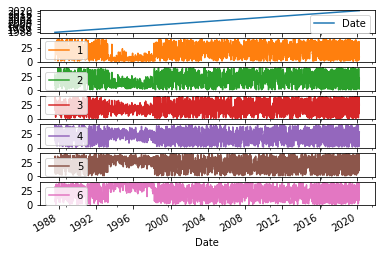

In [82]:
uni_data.plot(subplots=True)

In [9]:
uni_data = uni_data.values

In [10]:
TRAIN_SPLIT = int(len(dft.index)*.8)
#TRAIN_SPLIT = int(dft['Draw'].loc[df['Draw'].idxmax()]*.8)
print( len(dft.index*.7),TRAIN_SPLIT)

94 75


In [11]:
tf.random.set_seed(13)

In [12]:
# uni_data.plot(subplots=True)

uni_data = dft[Ball_to_predict]
uni_data.index = dft['Draw']
uni_data.head()

In [13]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_mean

22.85333333333333

In [14]:
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_train_std

11.292113275300697

In [15]:
uni_data = (uni_data - uni_train_mean) / uni_train_std
uni_data

array([-0.60691326,  1.25279178, -1.58104448,  0.81000486,  0.36721795,
       -0.4297985 , -1.93527401,  0.98711963, -0.60691326,  1.51846393,
       -0.87258541, -0.16412635,  1.16423439, -0.16412635,  0.81000486,
        1.25279178, -1.40392971,  1.51846393,  0.81000486, -1.66960186,
       -0.16412635, -0.25268373, -0.07556897,  0.45577533, -1.04970018,
        0.6328901 ,  0.19010318, -1.22681495, -0.34124112,  1.51846393,
        0.36721795, -1.66960186, -1.49248709,  0.1015458 ,  0.1015458 ,
       -1.31537233, -1.66960186, -0.69547065,  1.16423439,  1.34134916,
        0.81000486,  1.34134916,  0.72144748, -1.31537233, -0.78402803,
        0.89856225,  0.6328901 , -1.66960186,  0.36721795,  0.19010318,
       -1.13825756,  0.19010318,  0.27866057,  1.34134916,  0.98711963,
        1.25279178,  0.1015458 , -0.16412635, -0.25268373, -0.9611428 ,
       -0.16412635,  1.42990654, -1.84671663, -0.16412635, -0.60691326,
       -0.69547065,  1.51846393,  0.36721795, -0.16412635, -0.51

In [16]:
univariate_past_history = 8
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)

8 75


In [17]:
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

83 None


In [18]:
print(x_train_uni.shape, y_train_uni.shape)

(67, 8, 1) (67,)


In [19]:
print(x_val_uni.shape, y_val_uni.shape)

(11, 8, 1) (11,)


In [20]:
print ('Single window of past history')
print (x_train_uni[-1])
print ('\n Bonus ball to predict')
print (y_train_uni[-1])

Single window of past history
[[ 1.51846393]
 [ 0.36721795]
 [-0.16412635]
 [-0.51835588]
 [ 0.54433271]
 [ 1.42990654]
 [-0.78402803]
 [ 1.07567701]]

 Bonus ball to predict
-1.2268149455810726


In [21]:
print ('Single window of past history')
print (x_train_uni[-1]*uni_train_std+uni_train_mean)
print ('\n Bonus ball to predict')
print (y_train_uni[-1]*uni_train_std+uni_train_mean)

Single window of past history
[[40.]
 [27.]
 [21.]
 [17.]
 [29.]
 [39.]
 [14.]
 [35.]]

 Bonus ball to predict
9.0


In [22]:
BATCH_SIZE = 256
BUFFER_SIZE = 300

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [26]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [27]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(11, 1)


In [28]:
EVALUATION_INTERVAL = 300
EPOCHS = 100

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 300 steps, validate for 50 steps
Epoch 1/100
300/300 [==============================] - 3s 9ms/step - loss: 0.7877 - val_loss: 1.1116
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.7297 - val_loss: 1.1643
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6118 - val_loss: 1.1683
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.4555 - val_loss: 1.1211
Epoch 5/100
300/300 [==============================] - 1s 5ms/step - loss: 0.3489 - val_loss: 1.1716
Epoch 6/100
300/300 [==============================] - 1s 5ms/step - loss: 0.2593 - val_loss: 1.2367
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1913 - val_loss: 1.3229
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1516 - val_loss: 1.3634
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.1258 - val_loss: 1.3812
Epoch 10/100
300/300 [==========================

Epoch 81/100
300/300 [==============================] - 2s 5ms/step - loss: 0.0035 - val_loss: 1.5164
Epoch 82/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0032 - val_loss: 1.5188
Epoch 83/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0044 - val_loss: 1.5158
Epoch 84/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 1.5177
Epoch 85/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 1.5179
Epoch 86/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 1.5184
Epoch 87/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 1.5216
Epoch 88/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 1.5203
Epoch 89/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 1.5206
Epoch 90/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0033

In [29]:
score = simple_lstm_model.evaluate(x_val_uni, y_val_uni, verbose=1)
score

11/11 [==============================] - 0s 26ms/sample - loss: 1.5260


1.5259839296340942

In [30]:
ver = '002'
simple_lstm_model.save('./Models/' + Ball_to_predict + ver)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Models/Bonus 2nd002/assets


# Predict

In [32]:
last_result = np.reshape(
    np.array(dft[Ball_to_predict].tail(8)),
    (8,1))
last_result.shape

(8, 1)

In [33]:
last_result

array([[39.],
       [ 6.],
       [26.],
       [ 6.],
       [ 5.],
       [ 2.],
       [ 6.],
       [25.]])

In [34]:
last_result = ((last_result-uni_train_mean)/uni_train_std)
last_result

array([[ 1.42990654],
       [-1.49248709],
       [ 0.27866057],
       [-1.49248709],
       [-1.58104448],
       [-1.84671663],
       [-1.49248709],
       [ 0.19010318]])

In [35]:
last_result = tf.convert_to_tensor(
    [last_result,last_result], dtype=np.float64, dtype_hint=None, name=None
)
last_result

<tf.Tensor: shape=(2, 8, 1), dtype=float64, numpy=
array([[[ 1.42990654],
        [-1.49248709],
        [ 0.27866057],
        [-1.49248709],
        [-1.58104448],
        [-1.84671663],
        [-1.49248709],
        [ 0.19010318]],

       [[ 1.42990654],
        [-1.49248709],
        [ 0.27866057],
        [-1.49248709],
        [-1.58104448],
        [-1.84671663],
        [-1.49248709],
        [ 0.19010318]]])>

# Predict current draw

In [36]:
simple_lstm_model.predict(last_result[:1]) * uni_train_std + uni_train_mean

array([[41.47309]], dtype=float32)